In [4]:
# !pip install halomod
import numpy as np
from scipy import *
from pylab import *
import os
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [54]:
import halomod
from halomod import HaloModel
# from halomod.cross_correlations import CrossCorrelations,_HODCross, ConstantCorr
from halomod import TracerHaloModel
from halomod.concentration import CMRelation
from hmf.halos.mass_definitions import SOCritical, FOF

In [9]:
print(f"Using halomod v{halomod.__version__}")

Using halomod v2.1.0


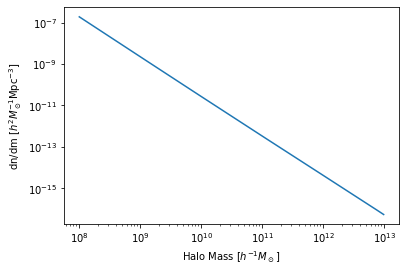

In [37]:
hm = TracerHaloModel(hm_logk_min=-1, hm_logk_max=2, Mmin=8, Mmax=13,)
plt.plot(hm.m, hm.dndm)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Halo Mass [$h^{-1} M_\odot$]")
plt.ylabel(r"dn/dm [$h^2 M_\odot^{-1} {\rm Mpc}^{-3}$]");

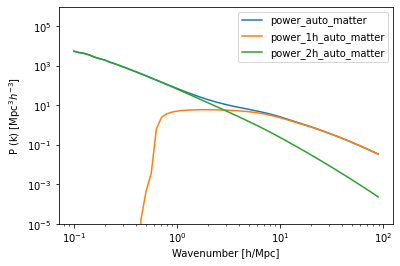

In [38]:
# plt.plot(hm.k, hm.nonlinear_power, label='Halofit')
plt.plot(hm.k_hm, hm.power_auto_matter, label='power_auto_matter')
plt.plot(hm.k_hm, hm.power_1h_auto_matter, label='power_1h_auto_matter')
plt.plot(hm.k_hm, hm.power_2h_auto_matter, label='power_2h_auto_matter')

### "This method is deprecated in favour of power_2h_auto_matter"
# plt.plot(hm.k_hm, hm.power_mm, label='power_mm')
# plt.plot(hm.k_hm, hm.power_mm_1h, label='power_mm_1h')
# plt.plot(hm.k_hm, hm.power_mm_2h, label='power_mm_2h')

plt.xscale('log')
plt.yscale('log')

plt.ylim(1e-5,1e6)
plt.legend()
plt.xlabel("Wavenumber [h/Mpc]")
plt.ylabel(r"P (k) [${\rm Mpc^3} h^{-3}$]");

In [39]:
### most code in https://github.com/halomod/halomod/blob/dev/src/halomod/halo_model.py
# help(hm)          # Lists many of the available quantities.
hm.quantities_available()

# def power_1h_auto_matter_fnc(self):
#     """A callable returning the halo model 1-halo DM auto-power spectrum."""
#     p = self._do_1halo_integral(
#         max_mmin=self.m[0],
#         integrand=self.dndm * self.m ** 2 * self.halo_profile_ukm ** 2,
#         mean_dens=self.mean_density0,
#     )


['ERROR_ON_BAD_MDEF',
 '_central_occupation',
 '_corr_mm_base_fnc',
 '_dlnsdlnm',
 '_do_1halo_integral',
 '_find_m_min',
 '_get_corr_2h_auto_fnc',
 '_get_naive_bias_effective',
 '_get_power_2h_auto_fnc',
 '_get_power_2h_primitive',
 '_growth_factor_fn',
 '_gtm',
 '_normalisation',
 '_power0',
 '_power_halo_centres_fnc',
 '_r_table',
 '_sigma_0',
 '_tm',
 '_total_occupation',
 '_unn_sig8',
 '_unn_sigma0',
 '_unnormalised_lnT',
 '_unnormalised_power',
 'bias',
 'bias_effective_matter',
 'bias_effective_tracer',
 'central_fraction',
 'central_occupation',
 'cmz_relation',
 'colossus_cosmo',
 'corr_1h_auto_matter',
 'corr_1h_auto_matter_fnc',
 'corr_1h_auto_tracer',
 'corr_1h_auto_tracer_fnc',
 'corr_1h_cross_tracer_matter',
 'corr_1h_cross_tracer_matter_fnc',
 'corr_1h_cs_auto_tracer',
 'corr_1h_cs_auto_tracer_fnc',
 'corr_1h_ss_auto_tracer',
 'corr_1h_ss_auto_tracer_fnc',
 'corr_2h_auto_matter',
 'corr_2h_auto_matter_fnc',
 'corr_2h_auto_tracer',
 'corr_2h_auto_tracer_fnc',
 'corr_2h_cro

In [62]:
### now try to hack dndm and halo_profile_ukm; 
### following https://halomod.readthedocs.io/en/latest/examples/getting_started.html#Defining-Your-Own-Models
### https://halomod.readthedocs.io/en/latest/examples/component-showcase.html

In [46]:
print (hm.dndm[:10])
print (hm.m[:10])

[1.88090884e-07 1.79912095e-07 1.72092744e-07 1.64630882e-07
 1.57511442e-07 1.50704226e-07 1.44170533e-07 1.37909849e-07
 1.31906361e-07 1.26162962e-07]
[1.00000000e+08 1.02329299e+08 1.04712855e+08 1.07151931e+08
 1.09647820e+08 1.12201845e+08 1.14815362e+08 1.17489755e+08
 1.20226443e+08 1.23026877e+08]


In [59]:
## 'SphericalOverdensity', 'SOGeneric', 'SOMean', 'SOCritical', 'SOVirial', 'FOF'
# hm.mdef_model = 'FOF' 
hm.mdef_model = 'SOCritical'

In [60]:
class ConstantConcentration(CMRelation):
    native_mdefs = (SOCritical(),)
    # native_mdefs = (FOF(),)
    _defaults = {"amplitude": 3}

    def cm(self, m, z=0):
        return self.params['amplitude'] * np.ones_like(m)

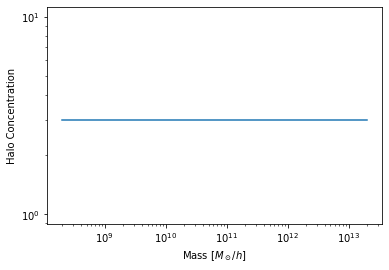

In [61]:
hm.halo_concentration_model = ConstantConcentration
plt.plot(hm.m, hm.cmz_relation)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Mass [$M_\odot/h$]")
plt.ylabel("Halo Concentration");

In [63]:
### to do (Aug 8)
### (1) customize dndm, c
### (2) check if Pk matches the observed curve, then Pk/h; HMF, etc
### (3) maybe it is easier to do the integration myself?? for 1halo term only
#### https://halomod.readthedocs.io/en/latest/examples/component-showcase.html
### https://github.com/halomod/hmf/blob/dev/src/hmf/mass_function/hmf.py